# Спектральное разложение вещественной матрицы 2x2


In [9]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
import ipywidgets as ipw
from matplotlib import pyplot as plt

In [10]:
# Лизу мона? (с)

lisa_w, lisa_h = 32, 48
lisa_str =\
'103 101 97  98  97  96  100 99  95  93  94  95  95  96  96  97  103 98  97  96  94  92  90  90  91  92  92  95  97  99  99  100\
 107 107 103 102 100 98  102 101 98  96  97  100 100 99  101 99  103 103 101 103 105 103 100 100 101 102 101 108 108 108 111 108\
 105 111 109 108 108 112 111 106 103 103 103 106 107 102 108 113 117 112 104 104 112 114 108 107 108 107 111 117 114 111 114 113\
 114 114 111 114 116 117 116 116 114 112 111 115 112 114 119 111 110 114 116 115 115 119 110 110 111 113 115 118 118 116 117 121\
 118 122 121 121 118 118 116 118 123 121 118 117 123 107 70  52  41  41  54  93  122 117 113 112 117 120 118 121 125 122 121 127\
 115 124 125 125 127 127 125 128 129 126 127 132 111 53  62  56  39  25  15  14  85  132 119 117 122 127 127 126 125 124 126 130\
 112 122 133 134 133 130 128 134 133 129 135 134 74  110 143 126 88  44  23  14  13  106 136 127 128 131 135 133 129 126 128 133\
 120 133 134 136 142 141 137 136 137 135 149 93  84  166 162 158 129 69  27  19  4   51  138 129 136 139 136 142 141 131 131 139\
 108 133 135 128 148 150 149 145 140 142 142 51  101 157 152 152 129 104 61  18  11  19  99  112 120 132 137 142 143 137 132 144\
 80  98  99  104 122 118 121 140 149 160 119 31  107 137 148 120 114 105 65  20  15  13  65  90  106 111 129 141 146 142 125 125\
 46  74  89  99  96  89  88  105 142 151 97  35  79  86  117 81  82  66  72  28  18  16  52  74  90  86  111 146 148 138 121 121\
 50  78  91  93  88  79  76  82  98  95  77  29  122 135 124 116 140 134 87  20  20  16  48  74  81  77  93  140 139 132 121 123\
 72  72  71  77  76  76  69  61  63  63  48  24  115 156 132 120 155 123 55  19  25  18  45  78  88  91  98  119 119 106 110 107\
 63  55  59  71  71  73  74  69  67  56  36  17  75  138 91  86  129 92  45  20  25  20  31  53  63  67  76  82  87  82  73  78\
 45  51  63  69  68  68  66  64  63  59  43  21  50  125 99  80  111 88  40  20  25  17  32  59  63  63  66  73  83  76  67  76\
 43  48  58  65  65  60  60  63  66  71  51  25  21  83  140 110 91  60  32  19  23  16  33  64  73  75  71  76  71  73  74  76\
 35  47  52  56  69  58  58  66  72  88  61  25  19  21  80  72  46  37  31  22  22  18  26  59  71  72  66  67  63  74  80  77\
 39  46  47  51  67  74  80  87  94  102 74  28  24  21  30  64  45  45  56  37  17  17  20  52  72  73  69  67  63  70  72  86\
 43  57  63  68  77  80  77  83  90  89  68  30  25  23  40  107 94  80  95  61  19  24  20  33  59  66  76  82  96  88  79  81\
 56  69  83  81  83  65  60  51  45  50  37  26  24  45  101 130 126 126 130 95  34  40  29  18  36  57  62  82  97  83  83  72\
 59  63  60  63  69  62  69  47  33  41  29  22  47  125 155 155 148 154 148 104 42  46  27  24  32  63  110 107 90  84  83  79\
 61  65  58  64  86  82  65  52  52  41  24  26  89  162 164 161 159 159 149 101 45  36  17  38  31  31  75  100 102 102 104 85\
 59  62  59  54  74  93  79  62  50  26  24  72  130 164 167 166 165 162 148 95  44  50  70  82  57  26  32  61  86  98  112 103\
 54  66  64  62  57  66  81  78  28  25  31  121 172 166 166 179 175 171 155 97  69  84  76  51  34  24  21  28  46  49  86  117\
 51  63  63  72  78  79  79  46  22  27  40  84  131 145 170 184 185 177 138 82  54  38  19  19  16  17  28  27  43  57  60  78\
 43  52  74  80  75  86  50  25  33  37  58  54  58  75  101 112 123 113 70  40  21  27  42  35  18  16  25  30  39  57  56  66\
 50  38  52  68  69  73  48  37  35  43  49  41  53  72  67  59  61  58  37  20  25  42  45  39  36  30  26  31  33  49  58  64\
 54  39  48  64  59  57  40  33  29  39  37  37  44  60  58  50  58  38  20  21  30  28  36  57  53  37  24  30  31  47  61  55\
 53  56  89  96  98  76  37  35  33  36  35  34  37  42  40  51  47  28  22  25  27  25  44  56  38  20  21  30  39  41  64  63\
 68  69  79  85  89  50  36  42  36  35  33  32  36  37  41  46  38  26  21  22  24  37  42  34  15  18  25  30  44  42  63  69\
 67  51  54  60  42  33  39  46  36  32  28  28  31  35  41  41  32  24  22  19  21  32  23  16  19  20  22  30  36  37  42  51\
 66  55  57  43  41  44  46  51  41  29  21  26  28  31  44  36  22  25  24  18  22  23  11  19  19  15  20  29  38  37  44  56\
 64  53  41  39  38  36  35  35  34  29  25  28  23  37  39  25  21  24  23  19  22  16  12  20  21  20  17  27  34  36  43  60\
 70  43  37  39  34  42  39  40  27  24  15  18  25  34  30  25  22  20  21  18  18  15  14  18  17  20  15  23  29  33  37  58\
 64  40  36  32  46  60  55  59  48  31  50  40  23  17  21  21  22  22  18  15  16  16  18  17  18  15  17  19  29  31  34  45\
 57  38  36  29  51  63  57  56  61  114 147 124 92  57  29  13  20  24  17  14  18  18  18  21  23  16  17  23  30  30  34  44\
 55  38  35  28  38  47  46  42  59  125 130 130 131 126 103 57  24  16  13  9   12  12  10  14  19  16  22  25  32  33  35  43\
 52  33  30  24  24  31  32  39  43  68  85  109 120 118 119 118 99  32  25  35  23  42  34  25  16  16  25  45  28  30  36  38\
 55  29  20  20  19  20  22  27  28  54  79  90  102 105 107 81  86  79  63  65  50  47  52  37  27  11  20  34  26  28  31  36\
 37  28  25  20  22  20  15  18  63  98  115 77  78  95  90  91  61  45  56  38  42  43  31  28  27  15  10  15  20  27  24  36\
 35  23  22  22  20  22  16  27  72  84  111 93  59  66  84  72  68  55  30  31  26  30  25  23  17  11  8   15  19  23  28  37\
 28  18  16  18  19  18  19  28  58  78  96  60  40  37  44  48  37  47  25  17  16  15  15  16  11  7   7   12  19  20  27  33\
 25  19  20  20  16  15  18  25  28  68  51  28  32  30  36  32  24  18  16  10  8   9   11  9   8   7   7   12  17  20  24  27\
 25  20  20  19  17  19  18  19  15  37  27  22  24  28  32  23  18  19  17  11  10  7   8   10  7   7   6   11  19  17  19  25\
 23  18  17  12  15  17  14  16  20  18  17  13  16  20  17  11  9   9   8   8   7   6   7   7   6   6   6   5   16  14  14  21\
 23  16  14  14  17  13  12  16  14  12  11  12  13  13  9   11  7   6   5   7   6   4   6   5   5   5   5   5   11  11  10  15\
 17  13  12  13  12  13  18  17  14  12  10  12  16  13  9   11  9   8   8   8   9   6   6   6   7   6   5   6   7   11  9   14\
 31  16  14  14  16  17  17  20  20  15  14  15  19  20  15  15  14  12  13  13  12  14  9   9   10  7   7   7   7   9   11  15'

(48, 32)


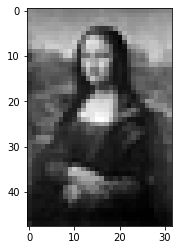

In [11]:
# Загрузка изображения и вычисление координат его точек на диаграмме рассеяния

lisa_pix = np.array(lisa_str.split()).astype(int)
lisa_img = lisa_pix.reshape((lisa_h, lisa_w))

print(lisa_img.shape)
plt.imshow(lisa_img, cmap='gray')
plt.show()

lisa_x = np.linspace(0, lisa_img.shape[1] - 1, lisa_img.shape[1])
lisa_y = np.linspace(lisa_img.shape[0] - 1, 0, lisa_img.shape[0])
lisa_x = 2 * lisa_img.shape[1] / max(lisa_img.shape) * (-0.5 + lisa_x / max(lisa_x))
lisa_y = 2 * lisa_img.shape[0] / max(lisa_img.shape) * (-0.5 + lisa_y / max(lisa_y))
lisa_x, lisa_y = np.meshgrid(lisa_x, lisa_y)
lisa_x = lisa_x.flatten()
lisa_y = lisa_y.flatten()

In [12]:
# Переменные, GUI и коллбэки. Костылей как в собесе. Изначально хотел наворотить
# свистоперделок красивых и разных, но оказалось, что в GC дюже плохая поддержка
# ipywidgets, потому как-то так...

# Исходная матрица и матрицы, на которые она декомпозируется
A = np.array([[1.0, 0.0], [0.0, 1.0]])
S = np.array([[1.0, 0.0], [0.0, 1.0]])
D = np.array([[1.0, 0.0], [0.0, 1.0]])

# Элементы GUI для установки значения элементов линейного оператора 
gui_sld_ax = ipw.FloatSlider(value=1, min=-2, max=2, step=0.1, description='ax',
  continuous_update=False, readout=True, readout_format='.1f')
gui_sld_ay = ipw.FloatSlider(value=0, min=-2, max=2, step=0.1, description='ay',
  continuous_update=False, readout=True, readout_format='.1f')
gui_sld_bx = ipw.FloatSlider(value=0, min=-2, max=2, step=0.1, description='bx',
  continuous_update=False, readout=True, readout_format='.1f')
gui_sld_by = ipw.FloatSlider(value=1, min=-2, max=2, step=0.1, description='by',
  continuous_update=False, readout=True, readout_format='.1f')
gui_lt_matrix = ipw.TwoByTwoLayout(top_left=gui_sld_ax, top_right=gui_sld_bx,
  bottom_left=gui_sld_ay, bottom_right=gui_sld_by, layout=ipw.Layout(width='33%'))

gui_out_set_matrix = ipw.Output()

def set_and_print_matrix(_):
  global A
  A = np.array(
      [[gui_sld_ax.value, gui_sld_bx.value],
       [gui_sld_ay.value, gui_sld_by.value]])
  gui_out_set_matrix.clear_output(wait=True)
  with gui_out_set_matrix:
    print('Линейный оператор 2x2:')
    print(A)

gui_sld_ax.observe(set_and_print_matrix, names='value')
gui_sld_ay.observe(set_and_print_matrix, names='value')
gui_sld_bx.observe(set_and_print_matrix, names='value')
gui_sld_by.observe(set_and_print_matrix, names='value')

# Кнопка "Единичная матрица" задает единичной матрицей
def reset_matrix(_):
  gui_sld_ax.value = 1.0
  gui_sld_bx.value = 0.0
  gui_sld_ay.value = 0.0
  gui_sld_by.value = 1.0

gui_btn_reset_matrix = ipw.Button(description='Единичная матрица')
gui_btn_reset_matrix.on_click(reset_matrix)

# Кнопка "Единичная матрица" задает А с двуми собственными векторами
def set_example1_matrix(_):
  gui_sld_ax.value = 1.0
  gui_sld_bx.value = 0.3
  gui_sld_ay.value = 0.3
  gui_sld_by.value = 1.0

gui_btn_set_example1_matrix = ipw.Button(description='Пример 1')
gui_btn_set_example1_matrix.on_click(set_example1_matrix)

# Кнопка посчитать и распечатать спектральное разложение
gui_out_decompose = ipw.Output()

def decompose_and_print(_):
  global S, D
  v, S = np.linalg.eig(A)
  D = np.diag(v)
  gui_out_decompose.clear_output()
  with gui_out_decompose:
    print('Исходная матрица А:\n', A, '\n')
    print('Диагональная матрица собственных значений D:\n', D, '\n')
    print('Матрица собственных векторов S:\n', S, '\n')
    print('Проверка на ортогональность S⋅S⁻¹:\n', S @ np.linalg.inv(S) ,'\n')
    print('Произведение S⋅D⋅S⁻¹:\n', S @ D @ np.linalg.inv(S))

gui_btn_decompose_and_print = ipw.Button(description='Декомпозировать матрицу')
gui_btn_decompose_and_print.on_click(decompose_and_print)

In [13]:
set_and_print_matrix(_)

display(gui_lt_matrix)
display(gui_out_set_matrix)
display(ipw.HBox([gui_btn_reset_matrix, gui_btn_set_example1_matrix]))

TwoByTwoLayout(children=(FloatSlider(value=1.0, continuous_update=False, description='ax', layout=Layout(grid_…

Output()

In [17]:
decompose_and_print(_)

display(gui_out_decompose)
display(gui_btn_decompose_and_print)

Output()

Button(description='Декомпозировать матрицу', style=ButtonStyle())

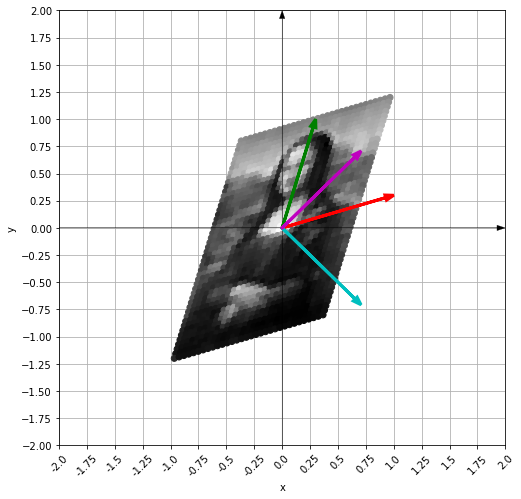

In [18]:
# Преобразование точек изображения
lisa_transformed = np.vstack([lisa_x, lisa_y]).T @ A

# Картинка
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xticks(np.arange(-2, 2.25, 0.25))
ax.set_yticks(np.arange(-2, 2.25, 0.25))
ax.set_xticklabels(ax.get_xticks(), rotation=45)
ax.grid(True)
ax.set_axisbelow(True)
plt.scatter(lisa_transformed[:, 0], lisa_transformed[:, 1], c=lisa_pix, cmap='gray')
# Орты мировой системы координат (системы координат plot())
ax.arrow(0, -2, 0, 4, length_includes_head=True, head_width=0.05, lw=0.25, color='k')
ax.arrow(-2, 0, 4, 0, length_includes_head=True, head_width=0.05, lw=0.25, color='k')
# Орты базиса, образованного столбцами линейного оператора A
ax.arrow(0, 0, A[0, 0], A[1, 0], length_includes_head=True, head_width=0.05, lw=3, color='r')
ax.arrow(0, 0, A[0, 1], A[1, 1], length_includes_head=True, head_width=0.05, lw=3, color='g')
# Собственные векторы линейного оператора A
ax.arrow(0, 0, S[0, 0], S[0, 1], length_includes_head=True, head_width=0.05, lw=3, ls='-', color='c')
ax.arrow(0, 0, S[1, 0], S[1, 1], length_includes_head=True, head_width=0.05, lw=3, ls='-', color='m')
plt.show()